In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from lifecycle import lifecycle_db
from lifecycle import lifecycle_model


%load_ext autoreload
%autoreload 2

#### Lifecycle Change: Create a classes

#!pip install DeepDiff
#!pip install dnspython

from lifecycle import lifecycle_model
from lifecycle import lifecycle_db


# local_db_cluster = 'cluster0.7ilyj.mongodb.net'
# local_username = 'projectUser'
# local_password = 'DCUpassword'
# localcloudclient = "mongodb+srv://{}:{}@{}/local_test".format(
#     local_username, local_password, local_db_cluster
#     )

my_life = lifecycle_model()
mydb = lifecycle_db (
#    localclient=localcloudclient,
    username = 'projectUser',password = 'DCUpassword',
    user='brendan.bonner2@mail.dcu.ie', organisation='Dublin City University',
    lifecycle=my_life)
mydb.init_model_db()

# Initialise Databases

model_vgg16 = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

model_resnet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)


In [4]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize filter shapes

model.summary()
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

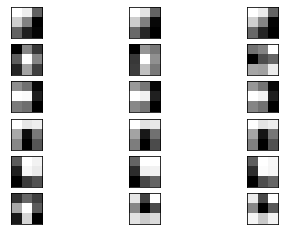

In [5]:

# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


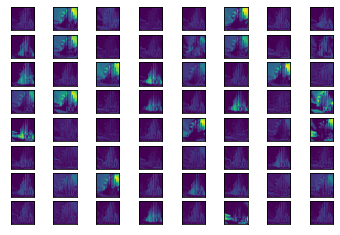

In [8]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# DCU Image is resized from 320 164 to 224x224
img = load_img('DCU.jpg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)

square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

In [37]:
signature, layer_data = my_life.create_model_data(model_vgg16)
print(signature)
layer_data_vg = layer_data['data']['1']
print(layer_data_vg)

ede69fca86a03c780a98dcec6fc1cfe406a3448dcba95663baa18bf853bc2f0f
{'weight_std': 0.2066994458436966, 'weight_mean': -0.0024379086680710316, 'bias_std': 0.32847991585731506, 'bias_mean': 0.5013911724090576, 'skew': -0.014519757591187954}


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________


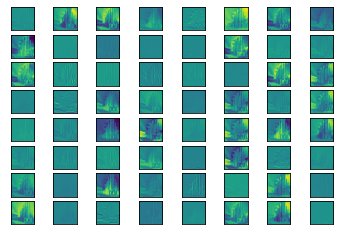

11038ddd9667dc41fdda32191266367a344ac28c0dde3bb3f5a86d8c7b67f0b0
{'weight_std': 0.11111902445554733, 'weight_mean': -0.0004897362668998539, 'bias_std': 2.104374896561012e-09, 'bias_mean': 4.563230349141634e-11, 'skew': -0.11236798763275146}


In [38]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = model_resnet50
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[2].output)
model.summary()

# DCU Image is resized from 320 164 to 224x224
img = load_img('DCU.jpg', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)

square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

signature, layer_data_rn = my_life.create_model_data(model_resnet50)
print(signature)
mydict = layer_data_rn['data']
layer_data_rn = {k: mydict[k] for k in list(mydict)[2]}['2']
print(layer_data_rn)

In [40]:
std = [layer_data_vg['weight_std'], layer_data_rn['weight_std']]
skew = [layer_data_vg['skew'], layer_data_rn['skew']]

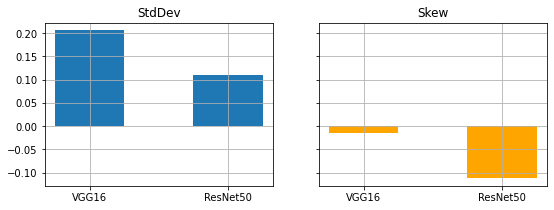

0.2067%, 0.1111%
-0.0145, -0.1124


In [67]:
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
x = ['VGG16', 'ResNet50']
axs[0].bar(x, std, 0.5)
axs[0].set_title('StdDev')
axs[0].grid()
axs[1].bar(x, skew,0.5,fc='orange')
axs[1].set_title('Skew')
axs[1].grid()
plt.show()
print('{:.4f}%, {:.4f}%'.format(std[0], std[1]))
print('{:.4f}, {:.4f}'.format(skew[0], skew[1]))
